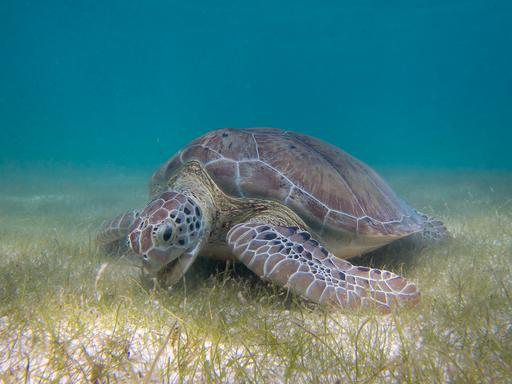

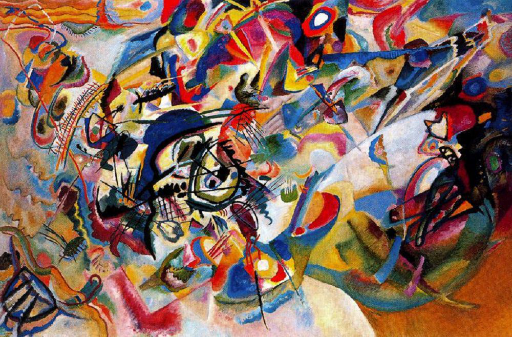

In [1]:
using Images

CONTENT_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/Green_Sea_Turtle_grazing_seagrass.jpg"
STYLE_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg"

content_img = load(CONTENT_URL)
style_img = load(STYLE_URL)

ratio = 512 / max(size(content_img)...)
content_img = imresize(content_img, ratio=ratio)
ratio = 512 / max(size(style_img)...)
style_img = imresize(style_img, ratio=ratio)

display(content_img)
display(style_img)

┣                    ┫ [0.02%, 1/5000, 00:00/00:17, 301.74i/s] 

┌ Warning: k=(Ptr{Nothing} @0x00007f1bde800000, 983040) v=57 ni=47
└ @ Knet /home/david.lin/.julia/packages/Knet/IIjk8/src/gcnode.jl:114


┣████████████████████┫ [100.00%, 5000/5000, 02:53/02:53, 28.95i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:44/02:44, 30.55i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:44/02:44, 30.56i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.62i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.65i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.64i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.61i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:44/02:44, 30.56i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.65i/s]                    ┫ [1.28%, 64/5000, 00:02/02:40, 30.32i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.61i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.62i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43, 30.61i/s] 
┣████████████████████┫ [100.00%, 5000/5000, 02:43/02:43

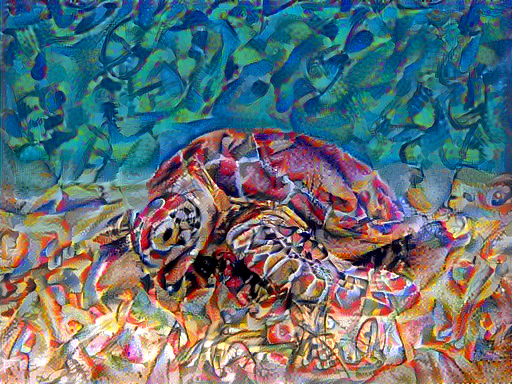

In [2]:
using StyleTransfer.Gatys2015
using Base.Iterators: take
using Printf

model = StyleTransfer(content_img, style_img)

losses= []
curr_img = content_img

mkpath("tmp/Gatys2015-1/outputs")
for (i, (img, loss)) in take(enumerate(model(content_img)), 20)
    push!(losses, loss)
    curr_img = img
    save("tmp/Gatys2015-1/outputs/$( @sprintf("%04d", i) ).png", map(clamp01nan, img))
end

display(curr_img)

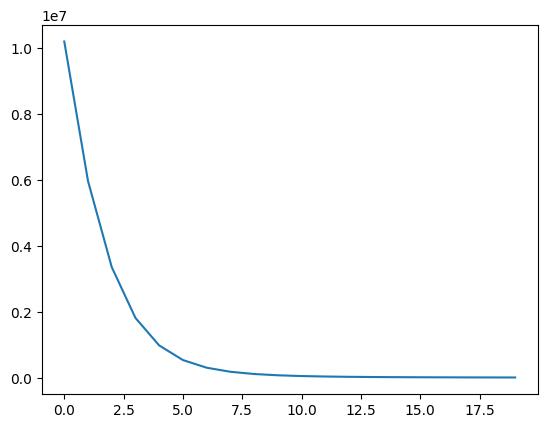

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1c90a27be0>

In [3]:
using PyPlot

plot(losses)